In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\sunin\Downloads\archive (12)\Test.csv")

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
#dropping ID column
df.drop(columns = ['ID'], inplace = True)

In [7]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [8]:
df.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2358.000000,2514.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.341094,1.551906
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [11]:
#to know about null values
df.isnull().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [18]:
df = df.dropna()   # To remove null values

In [50]:
df.isnull().sum()
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6


<Axes: xlabel='Spending_Score', ylabel='Count'>

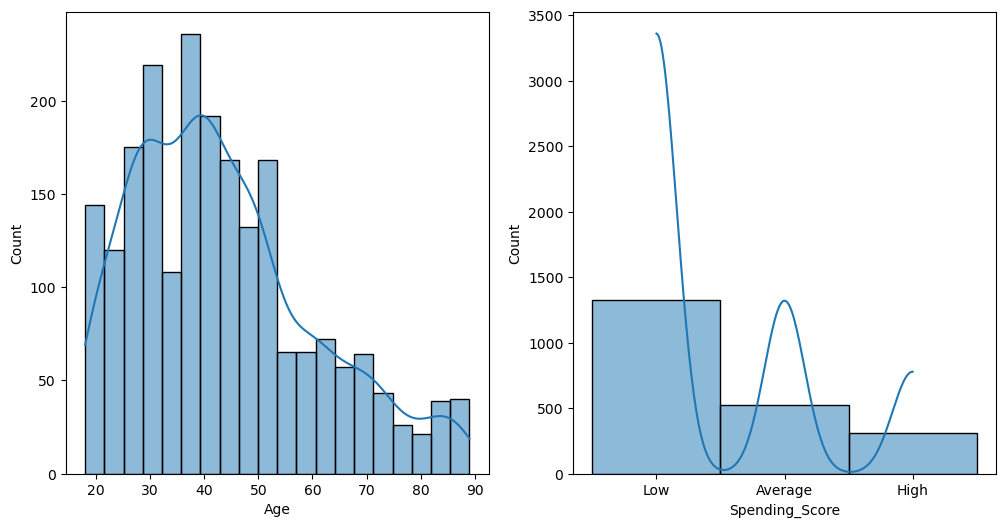

In [22]:
#To draw various plots showing age and spending score
fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.histplot(df['Age'],bins = 20,kde = True, ax = axes[0])
sns.histplot(df['Spending_Score'], bins = 20, kde = True, ax = axes[1])

<Axes: xlabel='Gender', ylabel='count'>

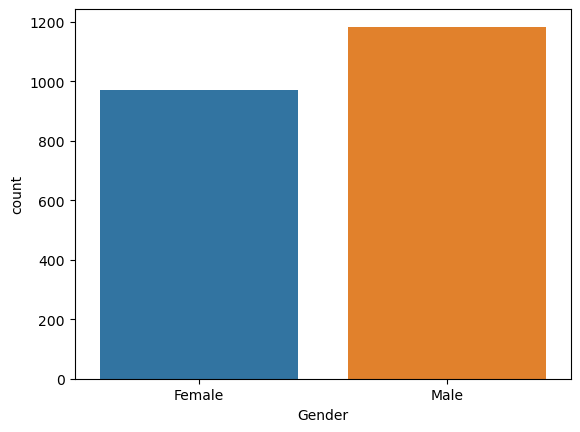

In [23]:
# 
sns.countplot(x =  'Gender', hue = 'Gender', data = df)

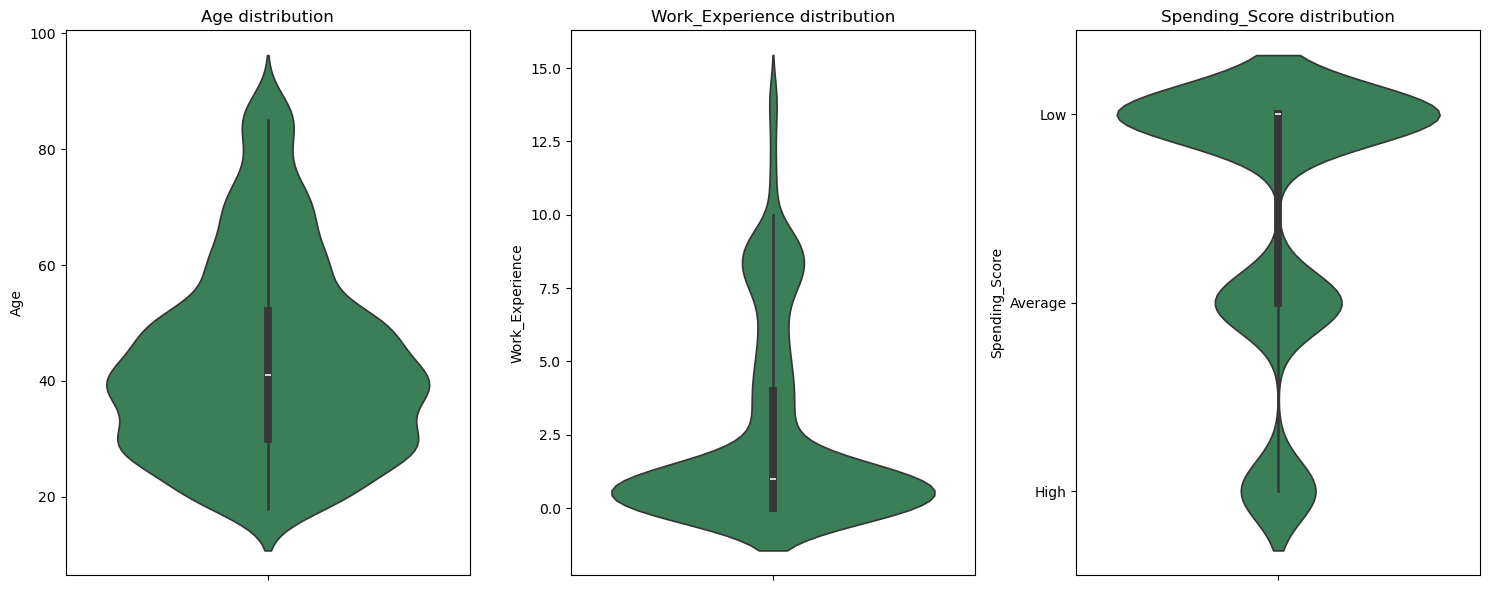

In [34]:
#Creating violin plots
cols = ['Age', 'Work_Experience','Spending_Score']
fig, axes = plt.subplots(1, len(cols),figsize = (15,6))
for i, cols in enumerate(cols):
    sns.violinplot(y = df[cols], ax =axes[i],color = 'seagreen')
    axes[i].set_title(f'{cols} distribution')
plt.tight_layout()
plt.show()

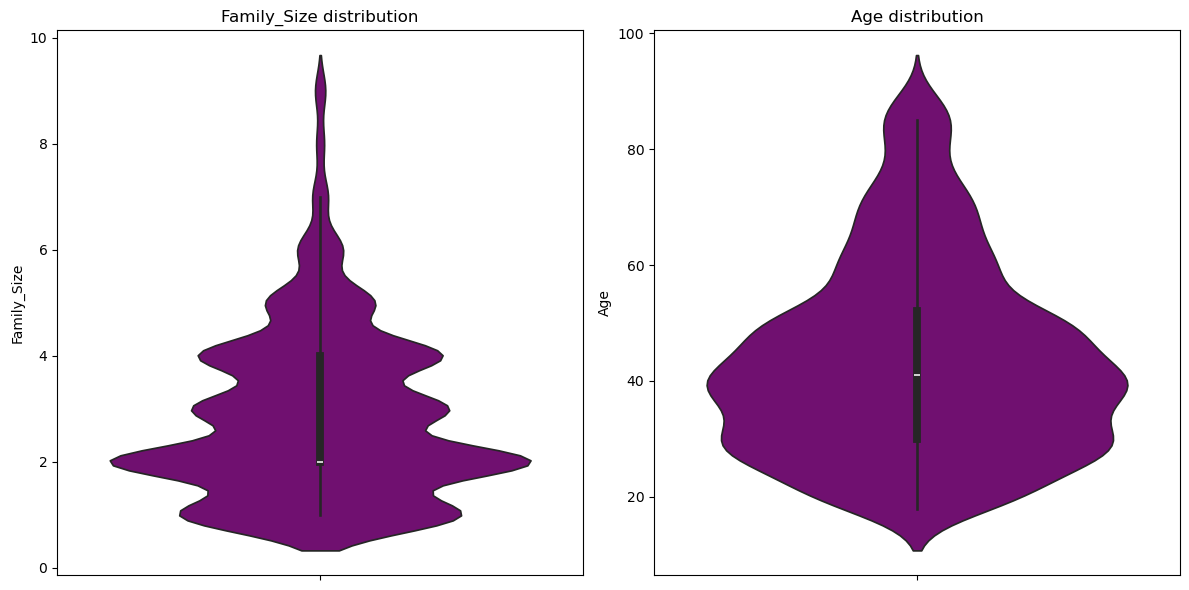

In [44]:
cols = ['Family_Size', 'Age']
fig, axes = plt.subplots(1,len(cols),figsize = (12,6))
for  i, cols in enumerate(cols):
    sns.violinplot(y = df[cols], ax = axes[i], color = 'purple')
    axes[i].set_title(f'{cols} distribution')
plt.tight_layout()
plt.show()

C:\Users\sunin\AppData\Local\Temp\ipykernel_25008\1216009712.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = agex, y = agey, palette = "mako")


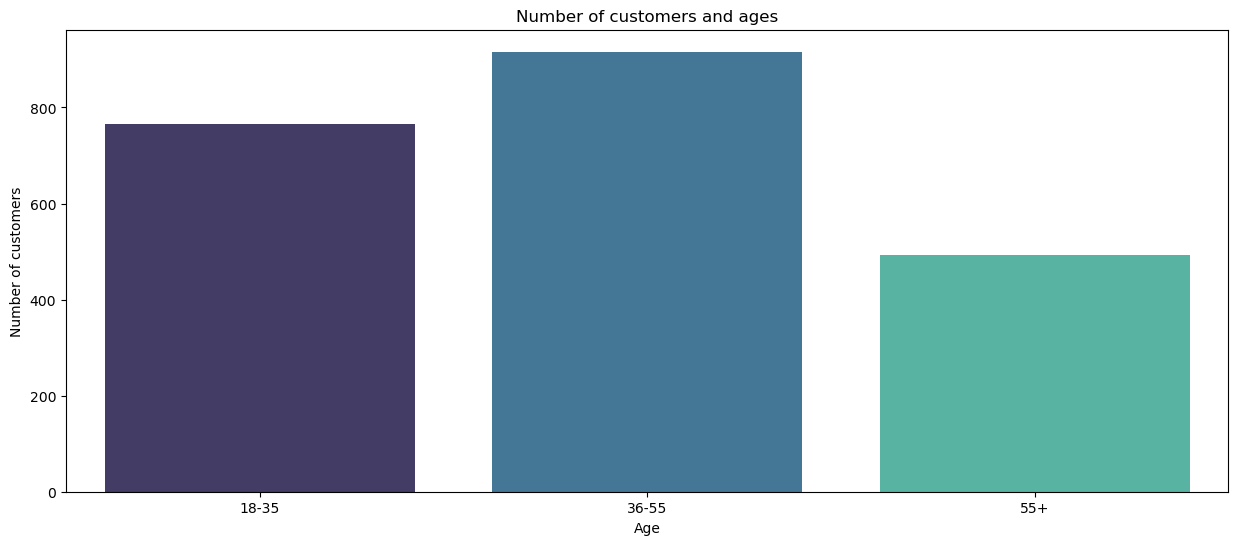

In [48]:
#Divide range into different categories and finding which range has highest number of customers
age_18_35 = df.Age[(df.Age >=18) & (df.Age <= 35)]
age_36_55  = df.Age[(df.Age >= 36) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]
agex = ["18-35","36-55","55+"]
agey = [len(age_18_35), len(age_36_55), len(age_55above)
       ]
plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey, palette = "mako")
plt.title("Number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

C:\Users\sunin\AppData\Local\Temp\ipykernel_25008\1322247993.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = wex, y = wey, palette = "rocket")


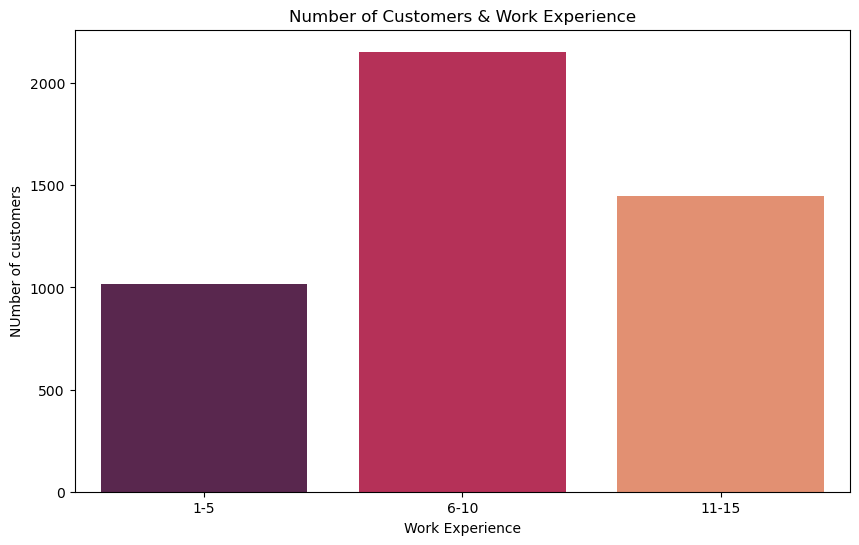

In [57]:
#Dividing work experience into different ranges and analysing it
we_1_5 = df.Work_Experience[(df.Work_Experience >= 1) & (df.Work_Experience <= 5)]
we_6_10 = df.Work_Experience[(df.Work_Experience) >= 6 & (df.Work_Experience <= 10)]
we_11_15 = df.Work_Experience[(df.Work_Experience) >= 11 & (df.Work_Experience <= 15)]
wex = ["1-5", "6-10","11-15"]
wey = [len(we_1_5),len(we_6_10),len(we_11_15)]
plt.figure(figsize = (10,6))
sns.barplot(x = wex, y = wey, palette = "rocket")
plt.title("Number of Customers & Work Experience")
plt.xlabel("Work Experience")
plt.ylabel("NUmber of customers")
plt.show()


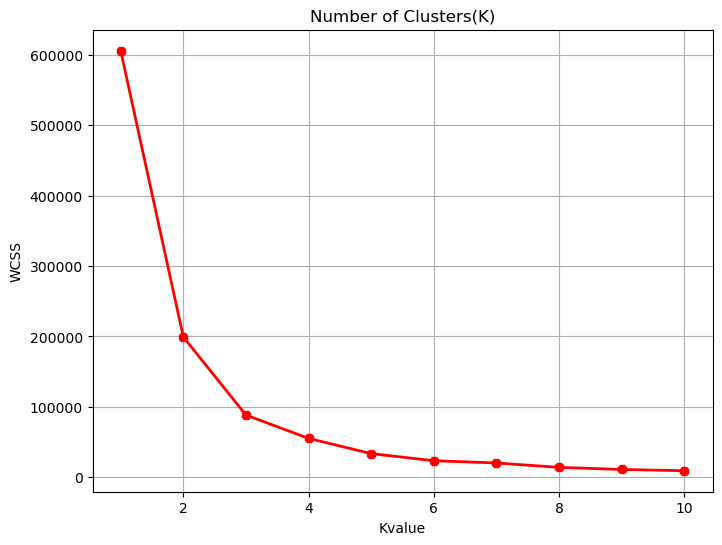

In [78]:
#Creating Clusters
score_map = {'Low': 1, 'Average': 2, 'High': 3}
df['Spending_Score'] = df['Spending_Score'].map(score_map)
X1 = df.loc[:,['Age', 'Spending_Score']]
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (8,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2,color = "red", marker = "8")
plt.title("Number of Clusters(K)")
plt.xlabel("Kvalue")
plt.ylabel("WCSS")
plt.show()


In [84]:
#From th eabove graph, we can see that elbow point comes at 4, so we can create 4 clusters
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)
print(label)


[3 3 1 ... 3 3 3]
